<a href="https://colab.research.google.com/github/willdphan/cifar-cnn/blob/main/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 CNN
> ## Steps in CNN

>>[Import Libraries](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=pBNkZeQ98syU)

>>[Define Device and Hyper-parameters](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=9KcXV61X5S7d)

>>[Perform Data Transformations and Data Loading](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=HRfIUOl54sUz)

>>[Define Classes](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=hsE9uMS34agf)

>>[Convert Image Tensor to Numpy Array and Show Images](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=0_asdT-m5cRH)

>>[Determine Layers and Hyper-parameters](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=8SvO8fS8cCCn)
>>>1.   Convolution layer(s): `torch.nn.Conv2d`
2.   Activation function: `torch.nn.ReLU, torch.nn.Sigmoid, torch.nn.Softplus, etc.`
3.   {Optional}
  *   Batch normalization: `torch.nn.BatchNorm2d`
  *   Pooling: `torch.nn.MaxPool2d`
  *   Drop out: `torch.nn.Dropout`
6.   Flatten: `torch.nn.Flatten`

>>[Create CNN Class](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=mx1wk--GwZ9k)

>>[Define Loss Function and Optimizer](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=B9x-6crA3rWX)

>>[Define Train Function](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=m70cfurP4C9M)

>>[Define Test Function](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=Yt-5KGkb4F8a)

>>[Call Train and Test Functions](#folderId=1ikmNGi-2pw1SJQf7HJHhsoHYdOgew_QB&updateTitle=true&scrollTo=W5BlVRHq4IUA)



### Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### Define Device and Hyper-parameters

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
image

### Perform Data Transformations and Data Loading
1. The code applies transformations to the CIFAR-10 dataset using torchvision.`transforms.Compose`, converting the images to tensors with `transforms.ToTensor()` and normalizing them with `transforms.Normalize(). `

2. It then creates data loaders with `torch.utils.data.DataLoader` for both the training and test sets, enabling efficient batch processing. The train_loader loads the training dataset with shuffling, while the test_loader loads the test dataset without shuffling. These data loaders facilitate easy iteration over the datasets during training and evaluation.

In [ ]:
# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
# transform and train/not train for train and test datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### Define Classes
10 Classes total.

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Convert Image Tensor to Numpy Array and Show Images
1. The `imshow` function is used to display images. It takes an image tensor as input, performs unnormalization to reverse the normalization process, converts the image tensor to a numpy array, and displays the image using `plt.imshow`.

2. Then the `imshow` function is used to display a grid of random training images from the `train_loader`. The images are obtained by calling `torchvision.utils.make_grid(images)`, which creates a grid of images from the images tensor. The resulting grid of images is then passed to the imshow function for display.

In [ ]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    print(images.shape)

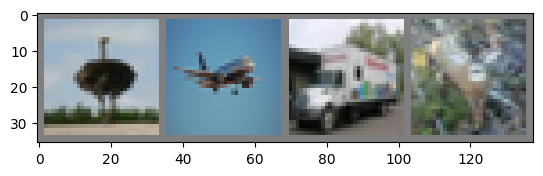

torch.Size([4, 3, 32, 32])


In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

### Determine Layers and Hyper-parameters

These are the hyper-parameters we choose manually based on intuition:
*   kernel_size
*   out_channels
*   out_features

`Image Shape: torch.Size([4, 3, 32, 32])`
*   4 refers to the batch size, indicating that there are 4 input samples in the batch. Each sample will be processed independently.
*   3 the number of input channels. In this case, it indicates that each input sample has 3 channels, typically representing the RGB channels of an image. In greyscale, we have 1 feature, in colour, we have 3 channels.
*   32, 32 represents the height and width

`conv1 = nn.Conv2d(3, 6, 5)`
*   3 is # of input channels from the image. Since we're dealing with RGB images, each image will have three color channels (red, green, and blue).
*   6 is the # of output channels (depth) of the convolutional layer. Determines how many kernels we want to use.
*   5 is is the kernel size of the convolutional layer. It specifies the spatial dimensions of the square filter or kernel applied to the input. In this case, the kernel size is 5x5, indicating a 5x5 square filter.

`pool = nn.MaxPool2d(2, 2)` - reduces number of params
*   2 is kernel_size: Specifies the size of the pooling kernel. In this case, it is set to 2, indicating a 2x2 pooling window.
*   2 is stride: Specifies the stride length for the pooling operation. In this case, it is also set to 2, which means the pooling operation moves by 2 pixels horizontally and vertically for each pooling step.

`conv2 = nn.Conv2d(6, 16, 5)`
*   6 is Input from output of first conv layer
*   16 is output. Determines how many kernels we want to use.
*   5 is is the kernel size of the convolutional layer. It specifies the spatial dimensions of the square filter or kernel applied to the input. In this case, the kernel size is 5x5, indicating a 5x5 square filter.

Below is helped code to understand size.

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

# Image Shape: torch.Size([4, 3, 32, 32])
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)

print('Image Shape:', images.shape)
x = conv1(images)
print('After 1st Conv:', x.shape)
x = pool(x)
print('After 1st Pool:', x.shape)
x = conv2(x)
print('After 2nd Conv:', x.shape)
x = pool(x)
print('After 2nd Pool:', x.shape)

Image Shape: torch.Size([4, 3, 32, 32])
After 1st Conv: torch.Size([4, 6, 28, 28])
After 1st Pool: torch.Size([4, 6, 14, 14])
After 2nd Conv: torch.Size([4, 16, 10, 10])
After 2nd Pool: torch.Size([4, 16, 5, 5])


### Create CNN Class

Create an init function to define the layers and hyper-parameters. Create a forward function to pass the data through the layers and apply activation functions.

Typical ingredients (in order):
1.   Convolution layer(s): `torch.nn.Conv2d`
2.   Activation function: `torch.nn.ReLU, torch.nn.Sigmoid, torch.nn.Softplus, etc.`
3.   Optional
  *   Batch normalization: `torch.nn.BatchNorm2d`
  *   Pooling: `torch.nn.MaxPool2d`
  *   Drop out: `torch.nn.Dropout`
6.   Flatten: `torch.nn.Flatten`



In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

### Define Loss Function and Optimizer

In [ ]:
model = ConvNet().to(device)
# define loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Define Train Function

The train function trains a given model using the provided training dataset. It performs multiple epochs of training, where each epoch consists of iterating over the batches of training data.

During each iteration, it performs a forward pass through the model, computes the loss using the specified criterion, and updates the model's parameters through backward pass and optimization.

The function also prints the loss at regular intervals. After training is completed, it saves the trained model's state dictionary to a file.

In [ ]:
def train(model, train_loader, criterion, optimizer, device, num_epochs):
    model.train()  # Set the model in training mode
    n_total_steps = len(train_loader)

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 2000 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    print('Finished Training')
    PATH = './cnn.pth'
    torch.save(model.state_dict(), PATH)


### Define Test Function
1. The test function evaluates the accuracy of a trained model on a test dataset. It calculates the total accuracy of the network and the accuracy for each class in the dataset.
2. The function takes the model, test data loader, device, and class labels as inputs.
3. It iterates over the test dataset, performs a forward pass through the model, compares the predicted labels with the true labels, and updates the accuracy counters.
4. Finally, it calculates and prints the accuracy of the entire network and the accuracy for each class.

In [ ]:
def test(model, test_loader, device, classes):
    model.eval()  # Set the model in evaluation mode
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(len(classes))]
    n_class_samples = [0 for _ in range(len(classes))]
    # evaluates accuracy of model
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # keep track of entire network
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            # keeps track of correct for each class
            for i in range(labels.size(0)):
                label = labels[i]
                pred = predicted[i]
                if label == pred:
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

    # print average accuracy of entire network
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of entire network: {acc} %')

    # print accuracy for each class
    for i in range(len(classes)):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


### Call Train and Test Functions

In [ ]:
# Calls train and test functions using the defined hyper-parameters above
# Training
train = train(model, train_loader, criterion, optimizer, device, num_epochs)

# Testing
test = test(model, test_loader, device, classes)

Epoch [1/5], Step [2000/12500], Loss: 2.3070
Epoch [1/5], Step [4000/12500], Loss: 2.2782
Epoch [1/5], Step [6000/12500], Loss: 2.2896
Epoch [1/5], Step [8000/12500], Loss: 2.2916
Epoch [1/5], Step [10000/12500], Loss: 2.2867
Epoch [1/5], Step [12000/12500], Loss: 2.2883
Epoch [2/5], Step [2000/12500], Loss: 2.7687
Epoch [2/5], Step [4000/12500], Loss: 1.8958
Epoch [2/5], Step [6000/12500], Loss: 2.8800
Epoch [2/5], Step [8000/12500], Loss: 2.4715
Epoch [2/5], Step [10000/12500], Loss: 2.8355
Epoch [2/5], Step [12000/12500], Loss: 1.7216
Epoch [3/5], Step [2000/12500], Loss: 1.5986
Epoch [3/5], Step [4000/12500], Loss: 1.4257
Epoch [3/5], Step [6000/12500], Loss: 1.7132
Epoch [3/5], Step [8000/12500], Loss: 1.4569
Epoch [3/5], Step [10000/12500], Loss: 2.6251
Epoch [3/5], Step [12000/12500], Loss: 1.3545
Epoch [4/5], Step [2000/12500], Loss: 1.9238
Epoch [4/5], Step [4000/12500], Loss: 2.0692
Epoch [4/5], Step [6000/12500], Loss: 1.2742
Epoch [4/5], Step [8000/12500], Loss: 1.4834
Epoc